# Grabbing Jewel's SnowPit Data

1. Grab pit and format correctly and be named correctly
2. Loop through folder of .csv's and create correct temperature profiles
3. Merge all profiles into one "dictionary"??? geopandas magic dataframe?

Test Blob: 1DufHRYtWqxQUFrfqdFx1FViFbaTCkmAV

In [1]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1DufHRYtWqxQUFrfqdFx1FViFbaTCkmAV', header=None)

In [2]:
df

,0,1,2
0,Location:,County Line,NaN
1,Type:,Open,NaN
2,Easting:,756905,NaN
3,Northing:,4324353,NaN
4,Surveyor:,J. Lund,NaN
5,Time:,3/12/20 9:58,NaN
6,Time Type:,AM,NaN
7,Air Temp:,-2.8,NaN
8,Hs:,111,NaN
9,Ground:,"Rough ground, no info on vegetation.",NaN


pandas subsetting during imports...
need to read metadata into separate columns
and rename columns to match SnowEx naming conventions

In [3]:
# grab the snow temperature data
dfdata = pd.read_csv('https://drive.google.com/uc?export=download&id=1DufHRYtWqxQUFrfqdFx1FViFbaTCkmAV', header = 13)

In [4]:
dfdata

,Hs,Temperature,Notes
0,110,-4.4,NaN
1,100,-3.5,NaN
2,90,-3.2,NaN
3,80,-3.1,NaN
4,70,-3.1,NaN
5,60,-3.0,NaN
6,50,-2.8,NaN
7,40,-2.7,NaN
8,30,-2.6,NaN
9,20,-2.2,NaN


In [5]:
# grab the metadata only
dfmeta = df.head(12)

In [6]:
dfmeta

,0,1,2
0,Location:,County Line,NaN
1,Type:,Open,NaN
2,Easting:,756905,NaN
3,Northing:,4324353,NaN
4,Surveyor:,J. Lund,NaN
5,Time:,3/12/20 9:58,NaN
6,Time Type:,AM,NaN
7,Air Temp:,-2.8,NaN
8,Hs:,111,NaN
9,Ground:,"Rough ground, no info on vegetation.",NaN


In [7]:
# transpose the metadata to columns
dftranspose = dfmeta.transpose().head(2)

In [8]:
dftranspose

,0,1,2,3,4,5,6,7,8,9,10,11
0,Location:,Type:,Easting:,Northing:,Surveyor:,Time:,Time Type:,Air Temp:,Hs:,Ground:,Notes:,Wx:
1,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."


In [9]:
# grab column names from the first row
newheader = dftranspose.iloc[0]

In [10]:
newheader

0      Location:
1          Type:
2       Easting:
3      Northing:
4      Surveyor:
5          Time:
6     Time Type:
7      Air Temp:
8            Hs:
9        Ground:
10        Notes:
11           Wx:
Name: 0, dtype: object

In [11]:
# remove the column names row
dftranspose = dftranspose[1:]

In [12]:
dftranspose

,0,1,2,3,4,5,6,7,8,9,10,11
1,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."


In [13]:
# add column names to transposed metadata
dftranspose.columns = newheader
dftranspose

,Location:,Type:,Easting:,Northing:,Surveyor:,Time:,Time Type:,Air Temp:,Hs:,Ground:,Notes:,Wx:
1,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."


In [14]:
# duplicate rows of metadata to length of snow pit temperature profile
dfdup = dftranspose.reindex(dftranspose.index.repeat(len(dfdata))).reset_index(drop=True)
dfdup

,Location:,Type:,Easting:,Northing:,Surveyor:,Time:,Time Type:,Air Temp:,Hs:,Ground:,Notes:,Wx:
0,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
1,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
2,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
3,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
4,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
5,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
6,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
7,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
8,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."
9,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,111,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th..."


In [15]:
# merge dfdata with dfdup to make a complete df of snow profile temps
dfmerged = pd.concat([dfdup, dfdata], axis = 1)
dfmerged.keys()

Index(['Location:', 'Type:', 'Easting:', 'Northing:', 'Surveyor:', 'Time:',
       'Time Type:', 'Air Temp:', 'Hs:', 'Ground:', 'Notes:', 'Wx:', 'Hs',
       'Temperature', 'Notes'],
      dtype='object')

In [16]:
del dfmerged['Hs:']

In [17]:
dfmerged

,Location:,Type:,Easting:,Northing:,Surveyor:,Time:,Time Type:,Air Temp:,Ground:,Notes:,Wx:,Hs,Temperature,Notes
0,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",110,-4.4,NaN
1,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",100,-3.5,NaN
2,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",90,-3.2,NaN
3,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",80,-3.1,NaN
4,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",70,-3.1,NaN
5,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",60,-3.0,NaN
6,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",50,-2.8,NaN
7,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",40,-2.7,NaN
8,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",30,-2.6,NaN
9,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",20,-2.2,NaN


In [18]:
import geopandas 
gdf = geopandas.GeoDataFrame(
    dfmerged, geometry=geopandas.points_from_xy(dfmerged['Easting:'], dfmerged['Northing:']))


In [19]:
gdf

,Location:,Type:,Easting:,Northing:,Surveyor:,Time:,Time Type:,Air Temp:,Ground:,Notes:,Wx:,Hs,Temperature,Notes,geometry
0,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",110,-4.4,NaN,POINT (756905.000 4324353.000)
1,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",100,-3.5,NaN,POINT (756905.000 4324353.000)
2,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",90,-3.2,NaN,POINT (756905.000 4324353.000)
3,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",80,-3.1,NaN,POINT (756905.000 4324353.000)
4,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",70,-3.1,NaN,POINT (756905.000 4324353.000)
5,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",60,-3.0,NaN,POINT (756905.000 4324353.000)
6,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",50,-2.8,NaN,POINT (756905.000 4324353.000)
7,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",40,-2.7,NaN,POINT (756905.000 4324353.000)
8,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",30,-2.6,NaN,POINT (756905.000 4324353.000)
9,County Line,Open,756905,4324353,J. Lund,3/12/20 9:58,AM,-2.8,"Rough ground, no info on vegetation.",Temperature 9:58-10:10.,"Calm, mostly cloudy, but sun still shining (th...",20,-2.2,NaN,POINT (756905.000 4324353.000)


In [20]:
import utm
def utm_to_latlon(coords, zone_number, zone_letter):
    easting = coords[0]
    northing = coords[1]
    return utm.to_latlon(easting, northing, zone_number, zone_letter)

In [21]:
# Using nested list comprehension
gdf ["lat_lon_tuple"] = [[utm_to_latlon(xy, 13, "N") for xy in tuple(geom.coords)] for geom in gdf.geometry]

print(gdf)

      Location: Type: Easting: Northing: Surveyor:         Time: Time Type:  \
0   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
1   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
2   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
3   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
4   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
5   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
6   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
7   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
8   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
9   County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
10  County Line  Open   756905   4324353   J. Lund  3/12/20 9:58         AM   
11  County Line  Open   756905   4324353   J. Lund  

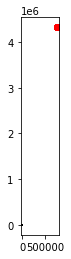

In [22]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
# TO DO - Need to separate Lat/Long and plot it on a clearer map